In [1]:
using PyPlot

__Ejercicio 1:__

In [2]:
#Definimos el método de Euler para funciones de cualquier dimensión. Las entradas son: f, la función que nos da la derivada;listt,el arreglo de t's; y x0, el valor inicial.

function euler_method(f,listt,x0)
    
#Definimos h como la distancia entra las dos primeras entradas de listt.
    h=listt[2]-listt[1]
    
#Definimos x como nuestro valor inicial (arreglo de valores iniciales)
    x=x0
#Definimos listx como un objeto de tipo indefinido. Aquí es donde iremos guardando los puntos de la solución.
    listx=[]
    
#Guardamos nuestro valor inicial en listx
    push!(listx,x)

#el siguiente for es para aplicar la relación de recurrencia
    for i in 1:length(listt)-1
        
#Recordemos que el valor inicial de x es x0, por lo que el rango de i es correcto.
        x = x + f(x,listt[i])*h
        
#Cada que aplicamos la relación de recurrencia, vamos guardando el punto en listx.
        push!(listx,x) 
    end
#la función regresa el arreglo de x's
    return listx
end;

In [3]:
#Definimos el método de Runge-Kutta de orden 4 para funciones de cualquier dimensión. Las entradas son: f, la función que nos da la derivada;listt,el arreglo de t's; y x0, el valor inicial.
function rk_4(f,listt,x0)
    
#Definimos h como la distancia entra las dos primeras entradas de listt.
    h=listt[2]-listt[1]
#Definimos x como nuestro valor inicial (arreglo de valores iniciales)    
    x=x0
    
#Definimos listx como un objeto de tipo indefinido. Aquí es donde iremos guardando los puntos de la solución.
    listx=[]
    
#Guardamos nuestro valor inicial en listx
    push!(listx,x)

#el siguiente for es para aplicar la relación de recurrencia
    for i in 1:length(listt)-1
        k1=f(x,listt[i])
        k2=f(x+(h/2)*k1,listt[i]+h/2)
        k3=f(x+(h/2)*k2,listt[i]+h/2)
        k4=f(x+h*k3,listt[i+1])
        
        x=x+(h/6)*(k1+2*k2+2*k3+k4)
        
 #Cada que aplicamos la relación de recurrencia, vamos guardando el punto en listx.       
        push!(listx,x)
    end
#la función regresa el arreglo de x's
    return listx
end;

In [5]:
f(x,t)=[x[2],-x[1]-x[2]];

In [43]:
timelist=0:0.1:100;

In [44]:
euler_x_sol= map(x->x[1],euler_method(f,timelist,[1,0]));
#como m=1, v=p
euler_p_sol= map(x->x[2],euler_method(f,timelist,[1,0]));

rk_x_sol=map(x->x[1],rk_4(f,timelist,[1,0]));
rk_p_sol=map(x->x[2],rk_4(f,timelist,[1,0]));

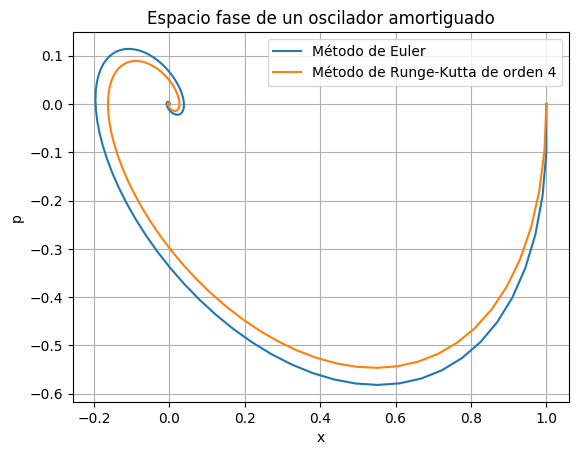

In [45]:
plot(euler_x_sol,euler_p_sol,label="Método de Euler")
plot(rk_x_sol,rk_p_sol,label="Método de Runge-Kutta de orden 4")
grid("on")
title("Espacio fase de un oscilador amortiguado")
xlabel("x")
ylabel("p")
legend()
show();

__Ejercicio 2:__

In [46]:
F(z,t)=[z[2],-sin(z[1])]; 

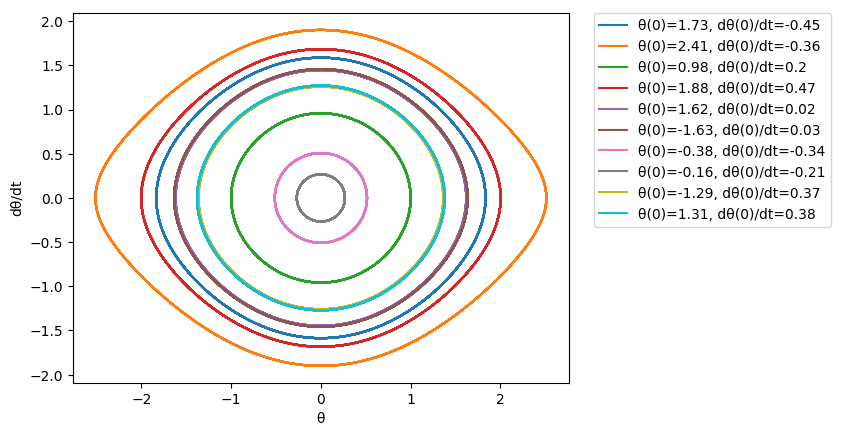

In [49]:
S=2.5
T=0.5

for i in 1:10
    θ_0=S*(2*rand()-1);
    dθ_0=T*(2*rand()-1);


    θ_solution=map(x->x[1],rk_4(F,0:0.01:100,[θ_0,dθ_0]));
    dθ_solution=map(x->x[2],rk_4(F,0:0.01:100,[θ_0,dθ_0]));

    plot(θ_solution,dθ_solution, label="θ(0)=$(round(θ_0,2)), dθ(0)/dt=$(round(dθ_0,2))")
end

xlabel("θ");
ylabel("dθ/dt");
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
show();

In [44]:
S=18
T=4

for i in 1:400
    θ_0=S*(2*rand()-1);
    dθ_0=T*(2*rand()-1);


    θ_solution=map(x->x[1],rk_4(F,0:0.01:20,[θ_0,dθ_0]));
    dθ_solution=map(x->x[2],rk_4(F,0:0.01:20,[θ_0,dθ_0]));

    plot(θ_solution,dθ_solution)
end

xlabel("θ");
ylabel("dθ/dt");
axes()[:set_xlim]([-5,5])
axes()[:set_ylim]([-4,4])
show();

LoadError: [91mUndefVarError: F not defined[39m

__Ejercicio 3:__


Tenemos la ecuación:
$$\frac{dx}{dt}=x^2-1.$$

In [12]:
#definimos la función
g(x,t)=x^2-1;
#La lista de t's
time=0:0.01:1;

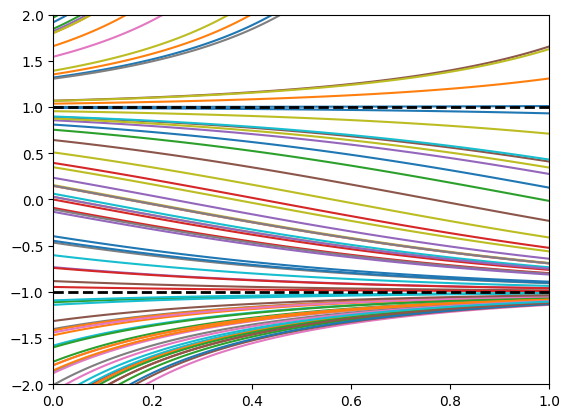

In [36]:
#Resolvemos para varias condiciones iniciales
for i in 1:100
    x0=3*(2*rand()-1)
    sol=rk_4(g,time,x0)
    plot(time,sol)
end
plot([0,1],[1,1],linestyle="--",linewidth=2.0,color="k")
plot([0,1],[-1,-1],linestyle="--",linewidth=2.0,color="k")

axes()[:set_xlim]([0,1])
axes()[:set_ylim]([-2,2]);


__Ejercicio 4:__

Tenemos $$\frac{dx}{dt}=x^2.$$

In [34]:
h(x,t)=x^2

0.0:0.01:1.0

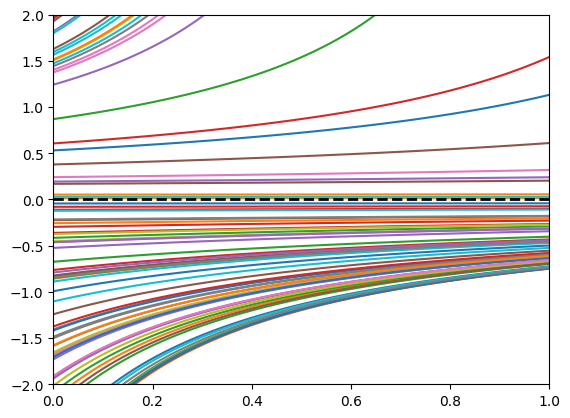

In [56]:
#Resolvemos para varias condiciones iniciales
for i in 1:100
    x0=3*(2*rand()-1)
    sol=rk_4(h,time,x0)
    plot(time,sol)
end
axes()[:set_xlim]([0,1])
axes()[:set_ylim]([-2,2]);
plot([0,1],[0,0],linestyle="--",linewidth=2.0,color="k");

__Ejercicio 5:__

In [101]:
H(a,b,c,d,x,t)=[a*x[1]+b*x[2],c*x[1]+d*x[2]];
listtime=0:0.1:20;

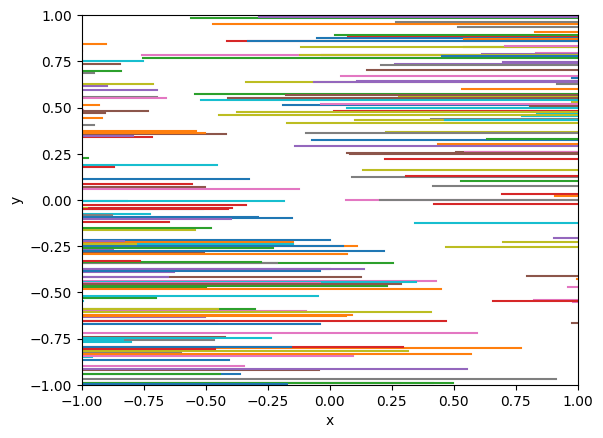

In [115]:
H1(x,t)=H(1,1,0,0,x,t)
for i in 1:200
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    x_list=map(x->x[1],rk_4(H1,listtime,[x0,y0]))
    y_list=map(x->x[2],rk_4(H1,listtime,[x0,y0]))
    
    plot(x_list,y_list)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])

xlabel("x")
ylabel("y")
show();


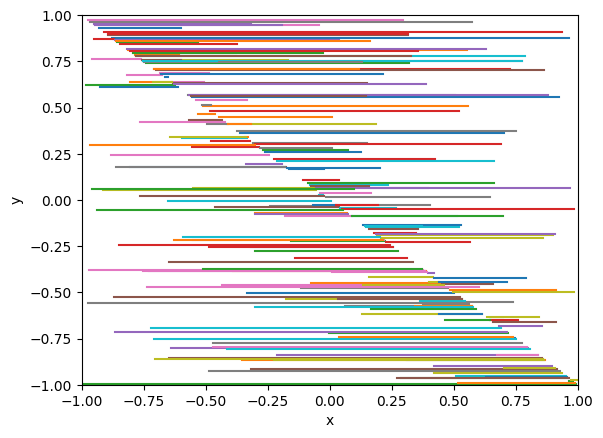

In [116]:
H2(x,t)=H(-1,-1,0,0,x,t)
for i in 1:200
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    x_list=map(x->x[1],rk_4(H2,listtime,[x0,y0]))
    y_list=map(x->x[2],rk_4(H2,listtime,[x0,y0]))
    
    plot(x_list,y_list)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();


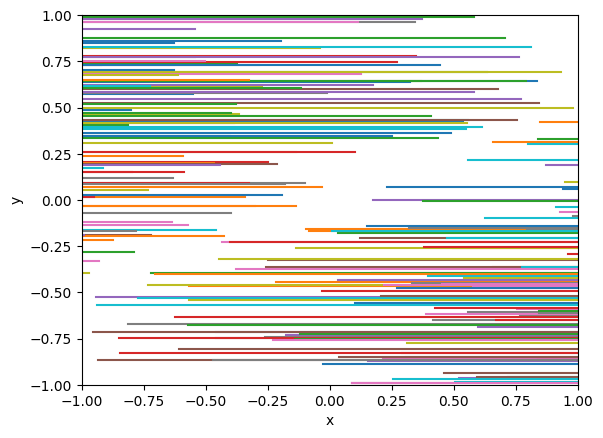

In [117]:
H3(x,t)=H(1,-2,0,0,x,t)
for i in 1:200
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    x_list=map(x->x[1],rk_4(H3,listtime,[x0,y0]))
    y_list=map(x->x[2],rk_4(H3,listtime,[x0,y0]))
    
    plot(x_list,y_list)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();


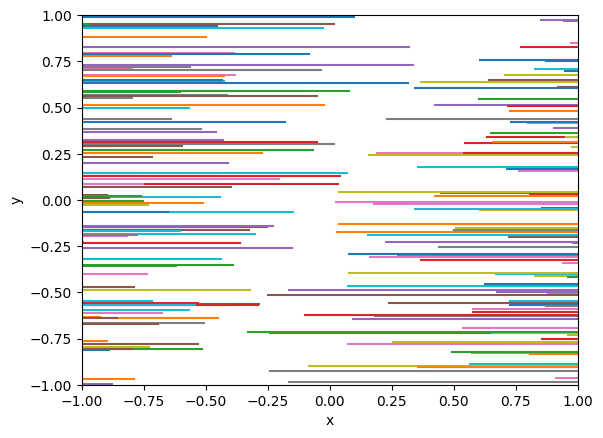

In [118]:
H4(x,t)=H(1,-0.5,0,0,x,t)
for i in 1:200
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    x_list=map(x->x[1],rk_4(H4,listtime,[x0,y0]))
    y_list=map(x->x[2],rk_4(H4,listtime,[x0,y0]))
    
    plot(x_list,y_list)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();


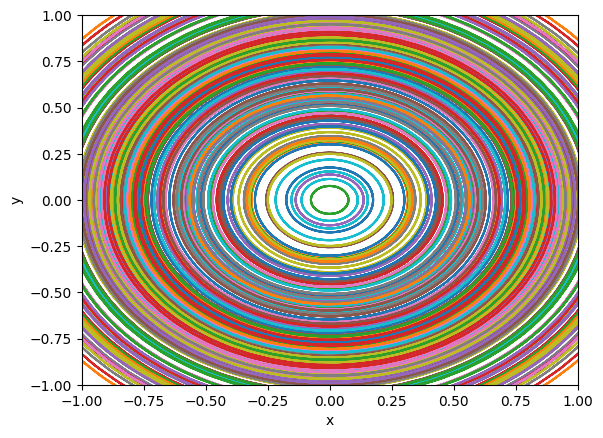

In [119]:
H5(x,t)=H(0,1,-1,0,x,t)
for i in 1:200
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    x_list=map(x->x[1],rk_4(H5,listtime,[x0,y0]))
    y_list=map(x->x[2],rk_4(H5,listtime,[x0,y0]))
    
    plot(x_list,y_list)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();


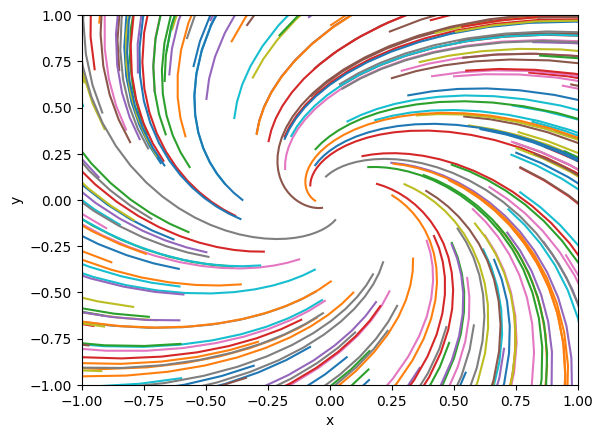

In [122]:
H6(x,t)=H(1,1,-1,1,x,t)
for i in 1:200
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    x_list=map(x->x[1],rk_4(H6,listtime,[x0,y0]))
    y_list=map(x->x[2],rk_4(H6,listtime,[x0,y0]))
    
    plot(x_list,y_list)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();


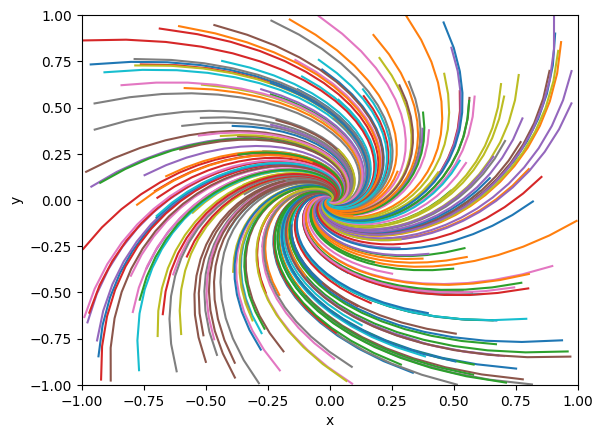

In [123]:
H7(x,t)=H(-1,1,-1,-1,x,t)
for i in 1:200
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    x_list=map(x->x[1],rk_4(H7,listtime,[x0,y0]))
    y_list=map(x->x[2],rk_4(H7,listtime,[x0,y0]))
    
    plot(x_list,y_list)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();


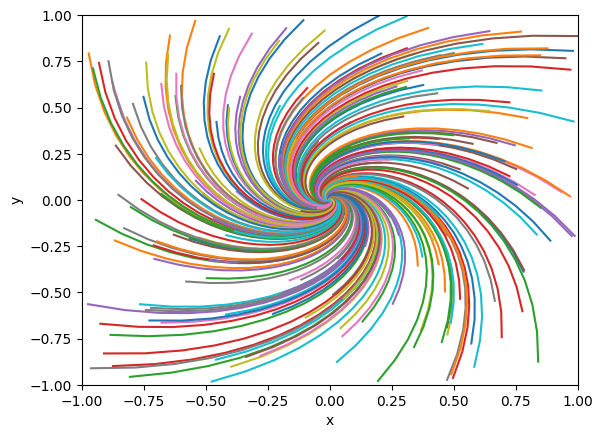

In [124]:
H8(x,t)=H(-1,-1,1,-1,x,t)
for i in 1:200
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    x_list=map(x->x[1],rk_4(H8,listtime,[x0,y0]))
    y_list=map(x->x[2],rk_4(H8,listtime,[x0,y0]))
    
    plot(x_list,y_list)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();


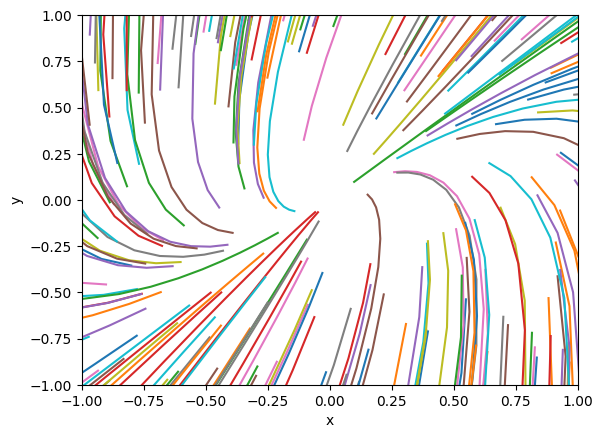

In [128]:
H9(x,t)=H(1,1,-2,4,x,t)
for i in 1:200
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    x_list=map(x->x[1],rk_4(H9,listtime,[x0,y0]))
    y_list=map(x->x[2],rk_4(H9,listtime,[x0,y0]))
    
    plot(x_list,y_list)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();


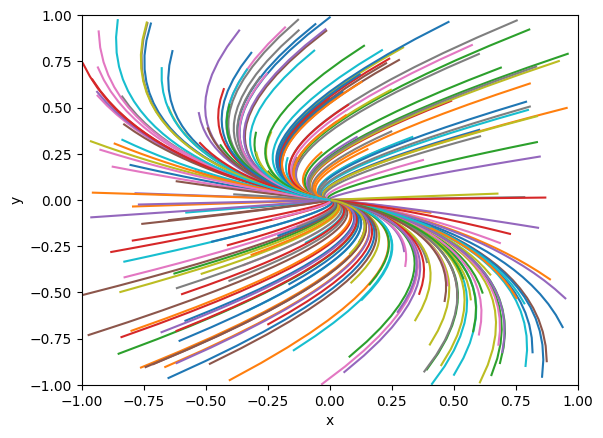

In [127]:
H10(x,t)=H(-1,-1,0,-1,x,t)
for i in 1:200
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    x_list=map(x->x[1],rk_4(H10,listtime,[x0,y0]))
    y_list=map(x->x[2],rk_4(H10,listtime,[x0,y0]))
    
    plot(x_list,y_list)
end

axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])
xlabel("x")
ylabel("y")
show();
